## 2.3.3. 선형모델

### 회귀의 선형모델

회귀의 선형모델을 위한 일반화된 예측 함수는 다음과 같다.   

y = w[0] * x[0] + w[1] * x[1] + ... + w[p] + x[p] + b   

x[0] ~ x[p] 까지는 하나의 데이터 포인트에 대한 특성, w와 b는 모델이 학습할 파라미터이다.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

w[0]: 0.393906  b: -0.031804


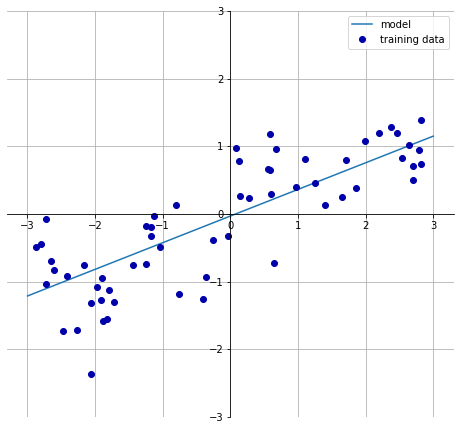

In [2]:
mglearn.plots.plot_linear_regression_wave()

### 선형회귀(최소제곱법)

예측과 훈련 세트 사이에 있는 타깃 y 사이의 평균제곱오차를 최소화하는 파라미터 w와 b를 찾는다.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

print(X[:5] , y[:5])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]] [-1.18073311  0.50015912  0.13772889  1.17396178 -1.32035898]


In [25]:
print("lr.coef_ : {}".format(lr.coef_))
print("lr.intercept_ : {}".format(lr.intercept_))

lr.coef_ : [0.39390555]
lr.intercept_ : -0.03180434302675976


In [26]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


-> Underfitting 상태임을 알 수 있음

#### 보스턴 주택가격 데이터셋

조금 더 복잡한 특성을 가진 데이터셋의 경우 Overfitting의 가능성이 높아짐

In [29]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


-> Overfitting

### Ridge 회귀를 이용하여 Overffiting 완화

In [54]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
훈련 세트 점수 : 0.75


In [55]:
ridge10 = Ridge(10).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
훈련 세트 점수 : 0.64


In [56]:
ridge01 = Ridge(0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
훈련 세트 점수 : 0.77


#### Ridge 규제에서 alpha 값이 미치는 영향

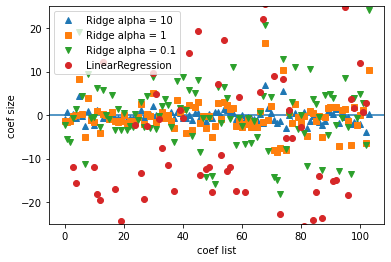

In [59]:
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.xlabel("coef list")
plt.ylabel("coef size")

xlims = plt.xlim()

plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()

#### 학습곡선

알파값이 같을 때 데이터셋의 크기에 따른 모델의 성능 변화

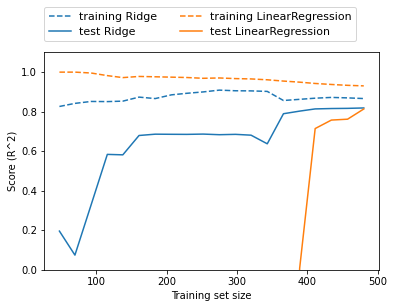

In [75]:
mglearn.plots.plot_ridge_n_samples()

### Lasso 규제 (L1규제)

Lasso 규제에서 어떤 계수는 0이 되어 제외되는 특성이 발생한다.    
-> 특성선택이 자동적으로 일어난다.    
-> 중요한 특성이 무엇인지 드러난다.

In [77]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(lasso.coef_ != 0))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 수 :  4


-> 104개의 특성 중 4개만 사용하며 과소적합 발생

In [79]:
Lasso?

Init signature:
Lasso(
    alpha=1.0,
    *,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear Model trained with L1 prior as regularizer (aka the Lasso)

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as
the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).

Read more in the :ref:`User Guide <lasso>`.

Parameters
----------
alpha : float, default=1.0
    Constant that multiplies the L1 term. Defaults to 1.0.
    ``alpha = 0`` is equivalent to an ordinary least square, solved
    by the :class:`LinearRegression` object. For numerical
    reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
    Given this, you should use the :class:`LinearRegression` object.

fit

alpha 값이 많아질 수록 여러번 반복하여 학습해야 함 (max_iter)

In [81]:
lasso001 = Lasso(alpha = 0.01, max_iter = 50000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 수 :  33


In [82]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 50000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 수 :  96


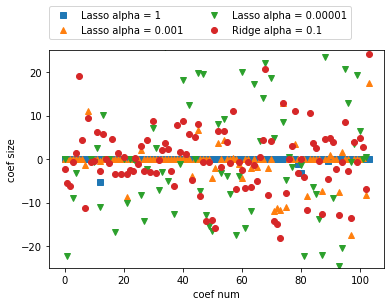

In [86]:
plt.plot(lasso.coef_, 's', label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha = 0.001")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha = 0.00001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")
plt.legend(ncol = 2, loc = (0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("coef num")
plt.ylabel("coef size")
plt.show()

### 선형 분류 모델

선형 회귀의 방정식이 임계치를 초과하는지 여부로 분류

/Users/jeongseunghwan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


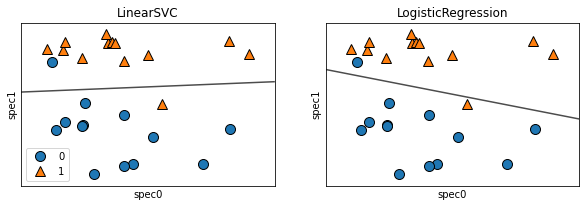

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("spec0")
    ax.set_ylabel("spec1")
axes[0].legend()

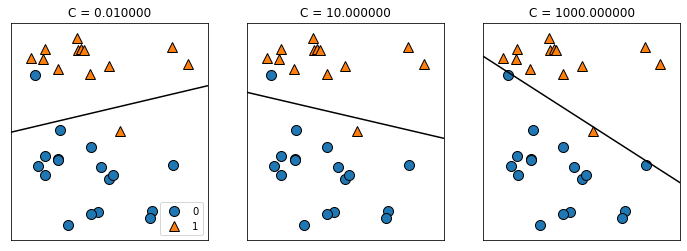

In [92]:
mglearn.plots.plot_linear_svc_regularization()

C값이 커질수록 규제는 감소하고, 과대적합에 가까워진다.

### LogisticRegression

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [8]:
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("Training set score : {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score : {:.3f}".format(logreg.score(X_test, y_test)))

Training set score : 0.958
Test set score : 0.958


기본값 C = 1 일 때,   
Training set과 Test set의 차이가 없어 과소적합 상태임을 알 수 있음

In [9]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("Training set score : {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score : {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score : 0.984
Test set score : 0.965


C값 증가로 규제가 감소하고, 성능은 더 증가한 모델

In [10]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("Training set score : {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score : {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score : 0.953
Test set score : 0.951


C값을 감소시키면 규제가 증가하고, 더 과소적합한 모델이 됨

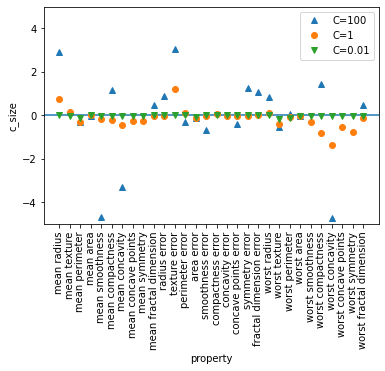

In [13]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")

plt.xticks(range(X.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("property")
plt.ylabel("c_size")
plt.legend()

#### L1규제로 각 이해하기 더 쉬운 모델 생성 

C=0.001인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도 : 0.92
C=1인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1인 l1 로지스틱 회귀의 테스트 정확도 : 0.96
C=100인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100인 l1 로지스틱 회귀의 테스트 정확도 : 0.98


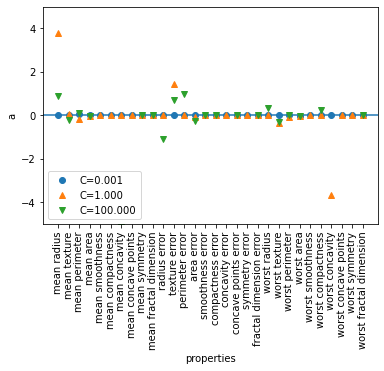

In [16]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1', max_iter=1000).fit(X_train, y_train)
    print("C={}인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={}인 l1 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("properties")
plt.ylabel("a")

plt.ylim(-5, 5)
plt.legend(loc=3)

### 다중 클래스 분류용 선형 모델

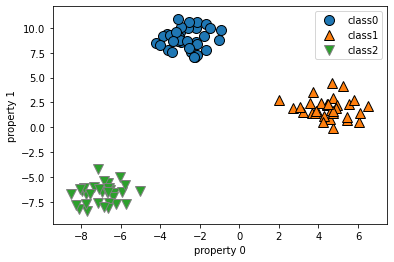

In [31]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("property 0")
plt.ylabel("property 1")
plt.legend(["class0", "class1", "class2"])

In [32]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기 : ", linear_svm.coef_.shape)
print("절편 배열의 크기 : ", linear_svm.intercept_.shape)

계수 배열의 크기 :  (3, 2)
절편 배열의 크기 :  (3,)


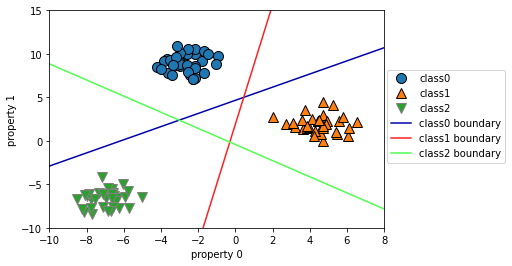

In [34]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("property 0")
plt.ylabel("property 1")
plt.legend(['class0', 'class1', 'class2', 'class0 boundary', 'class1 boundary', 'class2 boundary'], loc=(1.01, 0.3))

In [39]:
linear_svm.coef_

array([[-0.17492278,  0.23140477],
       [ 0.47621783, -0.06936587],
       [-0.18913903, -0.20400558]])

In [40]:
linear_svm.intercept_

array([-1.07745179,  0.13140393, -0.08604944])

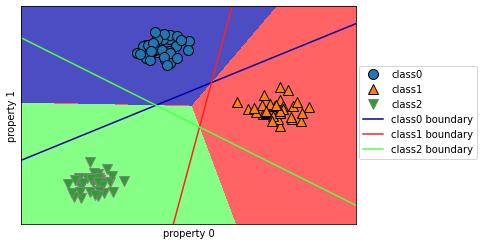

In [43]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['class0', 'class1', 'class2', 'class0 boundary', 'class1 boundary', 'class2 boundary'], loc=(1.01, 0.3))
plt.xlabel("property 0")
plt.ylabel("property 1")
plt.show()